# Resolução de Sistemas Não-Lineares

<div class="alert alert-block alert-success">
    <b>Notas de aula baseadas no livro: </b> 
    <p>Cálculo Numérico - Aspectos Teóricos e Computacionais, das autoras Márcia A. G. Ruggiero e Vera L. R. Lopes
</div>

No processo de resolução de um problema prático, é frequente a necessidade de se obter a solução de um sistema de equações não-lineares.

Dada uma função não linear $F: D \subset \mathbb{R}^n \rightarrow \mathbb{R}^n, F = (f_1, ..., f_n)^T$, o objeto é encontrar as soluções para:

$$F(x)=0$$

ou, equivalentemente:

\begin{equation}
f_1(x_1, x_2, ..., x_n) = 0\\
f_2(x_1, x_2, ..., x_n) = 0\\
\vdots\\
f_n(x_1, x_2, ..., x_n) = 0\\
\end{equation}


## Exemplo 1: Sistema não linear com 4 soluções, que são os pontos onde as curvas se interceptam.


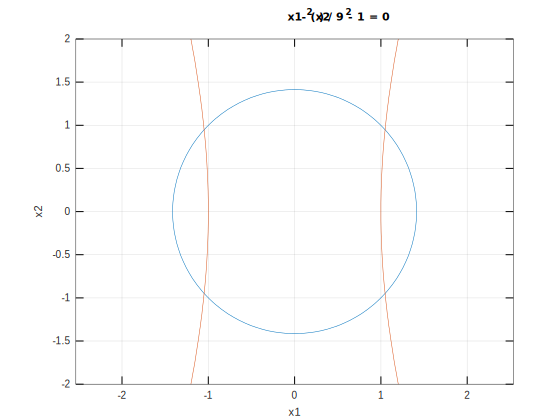

In [12]:
f1 = @(x1, x2) x1.^2 + x2.^2 - 2;
f2 = @(x1, x2) x1.^2 - (x2.^2)/9 - 1;
ezplot(f1, [-2 2])
hold on
ezplot(f2, [-2 2])
grid on
axis equal

## Exemplo 2: Sistema não linear sem solução. As curvas não se interceptam em nenhum ponto.

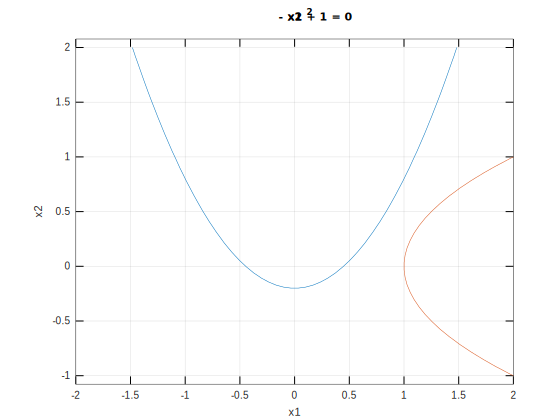

In [13]:
f1 = @(x1, x2) x1.^2 - x2 - 0.2;
f2 = @(x1, x2) x2.^2 - x1 + 1;
ezplot(f1, [-2 2])
hold on
ezplot(f2, [-2 2])
grid on
axis equal

Considere a seguinte notação:

\begin{equation}
x = 
\left(
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n
\end{array}
\right)
\end{equation}

e

\begin{equation}
F(x) =
\left(
\begin{array}{c}
f_1(x)\\
f_2(x)\\
\vdots\\
f_n(x)
\end{array}
\right)
\end{equation}

Cada função $f_i(x)$ é uma função não linear em $x$, $f_i: \mathbb{R}^n \rightarrow \mathbb{R}, i=1,...,n$, e portanto $F(x)$ é uma função não linear em $x$, $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$.

Supondo que $F(x)$ está definida num conjunto aberto $D \subset \mathbb{R}^n$ e que tem derivadas continuas nesse conjunto. Podemos supor ainda que existe pelo menos um ponto $x^{\ast} \in D$, tal que $F(x^{\ast})=0$. 

O vetor de derivadas parciais da função $f_i(x_1,x_2,...,x_n)$ é denominado vetor gradiente de $f_i(x)$ e será denotado por $\nabla f_i(x), i=1,...,n$. 

A matriz das derivadas parciais de $F(x)$ é chamada matriz Jacobiana e será denotada por $J(x)$:

\begin{equation}
J(x) = 
\left(
\begin{array}{c}
\nabla f_1(x)^T\\
\nabla f_2(x)^T\\
\vdots\\
\nabla f_n(x)^T
\end{array}
\right)
=
\left(
\begin{array}{cccc}
\frac{\partial f_1(x)}{\partial x_1} & \frac{\partial f_1(x)}{\partial x_2} & ... & \frac{\partial f_1(x)}{\partial x_n}\\
\frac{\partial f_2(x)}{\partial x_1} & \frac{\partial f_2(x)}{\partial x_2} & ... & \frac{\partial f_2(x)}{\partial x_n}\\
\vdots & \vdots & & \vdots\\
\frac{\partial f_n(x)}{\partial x_1} & \frac{\partial f_n(x)}{\partial x_2} & ... & \frac{\partial f_n(x)}{\partial x_n}\\
\end{array}
\right)
\end{equation}

## Exemplo 3: Matriz Jacobiana para o sistema não linear

\begin{equation}
F(x) = 
\begin{cases}
x_1^{3} - 3x_1x_2^{2} + 1 = 0\\
3x_1^{2}x_2 - x_2^{3} = 0
\end{cases}
\end{equation}

\begin{equation}
J(x) = 
\left(
\begin{array}{cc}
3x_1^{2} - 3x_2^{2} & -6x_1x_2\\
6x_1x_2  & 3x_1^{2} - 3x_2^{2}
\end{array}
\right)
\end{equation}

Os métodos para resolução de sistemas não lineares são iterativos, isto é, a partir de um ponto inicial $x^{(0)}$, geram uma sequência {$x^{(k)}$} de vetores e, na situação de convergência:

$$ \lim_{k \rightarrow \infty} x^{(k)} = x^\ast $$

onde $x^\ast$ é uma das soluções do sistema não linear.

## Critérios de parada

Em qualquer método iterativo, é preciso estabelecer critérios de parada para se aceitar um ponto {$x^{(k)}$} como aproximação para a solução exata $x^\ast$ ou para se detectar a divergência do processo.

Uma vez que na solução exata $x^\ast$ temos $F(x^\ast)=0$, um critério de parada consiste em verificar se todas as componentes de $F(x^{(k)})$ tem módulo pequeno.

Como $F(x^{(k)})$ é um vetor em $\mathbb{R}^n$, verificamos se $\left\Vert F(x^{(k)}) \right\Vert < \varepsilon$.

Em testes computacionais, é comum usarmos a norma infinito, para $v \in \mathbb{R}^n$:

$$ \left\Vert v \right\Vert_\infty = \max\limits_{1 \leq i \leq n} |v_i| $$

Assim, pode se verificar se $\left\Vert x^{(k+1)} - x^{(k)} \right\Vert$ está próximo de zero.

$$\left\Vert x^{(k+1)} - x^{(k)} \right\Vert_\infty < \varepsilon$$

Para se detectar a divergência e interromper os cálculos verificamos se atingiu um número máximo de iterações ou se $\left\Vert F(x^{(k)}) \right\Vert > 10^{20}$.



## Método de Newton

Do mesmo modo que a iteração de ponto fixo pode ser usada para resolver sistemas de equações não lineares, outros métodos abertos de localização de raízes, tal como o método de Newton-Raphson, podem ser usados para o mesmo propósito.

Lembre-se de que este método baseava-se no emprego da derivada (isto é, da inclinação) de uma função para fazer uma estimativa da sua interseção com o eixo da variável independente - isto é, a raiz. Inicialmente, usamos uma dedução geométrica para calcular essa estimativa. Uma alternativa é deduzi-la a partir de uma expansão em série de Taylor de primeira ordem:

$$f(x^{(k+1)}) = f(x^{(k)}) + f'(x^{(k)})(x^{(k+1)} - x^{(k)})$$

onde $x^{(k)}$ é a aproximação inicial da raiz e $x^{(k+1)}$ é o ponto em que a tangente intercepta o eixo x. Nesta interseção, $f(x^{(k+1)})$, por definição, é igual a zero, e assim temos:

$$x^{(k+1)} = x^{(k)} - \frac{ f(x^{(k)}) }{ f'(x^{(k)}) } $$

que é a forma para uma única equação a uma variável do método de Newton-Raphson. Com mais de uma variável temos para $i = 1,...,n$:

$$f_i(x^{(k+1)}) = f_i(x^{(k)}) + \nabla f_i(x^{(k)})^T (x^{(k+1)} - x^{(k)}) $$

E, portanto, o modelo linear para $F(x)$ em torno de $x^{(k)}$ fica:

$$F(x) \approx L_k(x) = F(x^{(k)}) + J(x^{(k)})(x - x^{(k)})$$

A nova aproximação $x^{(k+1)}$ será o zero do modelo linear $L_k(x)$.

$$L_k(x) = 0 \iff J(x^{(k)})(x - x^{(k)})=-F(x^{(k)})$$

Se denotarmos $(x - x^{(k)})$ por $s^{(k)}$ temos que $x^{(k+1)}=x^{(k)}+s^{(k)}$, onde $s^{(k)}$ é a solução para o sistema linear:

$$ J(x^{(k)})s^{(k)}=-F(x^{(k)}) $$

Observe que dado o ponto $x^{(k)}$, a matriz $J(x^{(k)})$ é obtida avaliando-se $J(x)$ em $x^{(k)}$ e, em seguida, o passo de Newton, $s^{(k)}$, é obtido a partir da resolução do sistema linear acima. Por este motivo, cada iteração é considerada computacionalmente cara.

## Algoritmo

- Passo 1: calcule $F(x^{(k)})$ e $J(x^{(k)})$
- Passo 2: se $\left\Vert F(x^{(k)}) \right\Vert < \varepsilon_1$ faça $\overline{x}=x^{(k)}$ e pare
- Passo 3: obtenha $s^{(k)}$, solução do sistema linear: $ J(x^{(k)})s^{(k)}=-F(x^{(k)}) $
- Passo 4: faça: $x^{(k+1)}=x^{(k)}+s^{(k)}$
- Passo 5: se $\left\Vert x^{(k+1)} - x^{(k)} \right\Vert < \varepsilon_2$ faça $\overline{x}=x^{(k+1)}$ e pare. Caso contrário vá para o passo seguinte.
- Passo 6: faça: $k = k + 1$ e volte ao passo 1.

## Exemplo 5: Aplicar o método de Newton à resolução do sistema não linear $F(x)=0$, onde $F(x)$ é dado por:

\begin{equation}
F(x) = 
\begin{cases}
x_1 + x_2 - 3 = 0\\
x_1^{2} + x_2^{2} - 9 = 0
\end{cases}
\end{equation}

\begin{equation}
J(x) = 
\left(
\begin{array}{cc}
1 & 1\\
2x_1  & 2x_2
\end{array}
\right)
\end{equation}

Considere $\varepsilon = \varepsilon_1 = \varepsilon_2 = 10^{-4}$ e $x^{(0)} = \begin{bmatrix}1\\ 5\end{bmatrix}$.

Resposta: $x^\ast = \begin{bmatrix}3\\ 0\end{bmatrix}$ ou $x^{**} = \begin{bmatrix}0\\ 3\end{bmatrix}$.

A caracteristica mais atraente do metodo de Newton é que sob condições adequadas envolvendo o ponto inicial $x^{(0)}$, a função $F(x)$ e a matriz Jacobiana $J(x)$, a sequencia gerada ${x^{(k)}}$ converge para $x^*$ com taxa quadrática.

## Método de Newton modificado

A modificação sobre o método de Newton consiste em se tomar a cada iteração $k$ a matriz Jacobiana como $J(x^{(0)})$, em vez de $J(x^{(k)})$.

E a partir de uma aproximação inicial $x^{(0)}$, a sequencia ${x^{(k)}}$ é gerada atraves de $x^{(k+1)}=x^{(k)}+s^{(k)}$, onde $s^{(k)}$ é a solução para o sistema linear:

$$ J(x^{(0)})s^{(k)}=-F(x^{(k)}) $$

Dessa forma, a matriz Jacobiana é avaliada apenas uma vez e, para todo $k$, o sistema linear a ser resolvido a cada iteração terá a mesma matriz de coeficientes: $J(x^{(0)})$.

Se usarmos a fatoração $LU$ para resolve-lo, os fatores $L$ e $U$ serão calculados apenas uma vez e, a partir da segunda iteração, será necessário resolver apenas dois sistemas triangulares para obter o valor de $s^{(k)}$.

## Exemplo 6: Aplicar o método de Newton (modificado) à resolução do sistema não linear do exemplo anterior.

